# DAT210x - Programming with Python for DS

## Module4- Lab1

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

from mpl_toolkits.mplot3d import Axes3D
from plyfile import PlyData, PlyElement

In [3]:
!pip install plyfile

  Running setup.py bdist_wheel for plyfile ... done
  Stored in directory: /home/nbuser/.cache/pip/wheels/a8/08/82/adda6eb5612121a26caf767b395105b95e3c4d8e63b2ec6b9d
Successfully built plyfile
grpcio 1.11.0 has requirement protobuf>=3.5.0.post1, but you'll have protobuf 3.4.1 which is incompatible.
pyasn1-modules 0.2.1 has requirement pyasn1<0.5.0,>=0.4.1, but you'll have pyasn1 0.1.9 which is incompatible.


In [2]:
# Look pretty...

# matplotlib.style.use('ggplot')
plt.style.use('ggplot')

Every `100` samples in the dataset, we save `1`. If things run too slow, try increasing this number. If things run too fast, try decreasing it... =)

In [3]:
reduce_factor = 100

Load up the scanned armadillo:

In [4]:
plyfile = PlyData.read('Datasets/stanford_armadillo.ply')

armadillo = pd.DataFrame({
  'x':plyfile['vertex']['z'][::reduce_factor],
  'y':plyfile['vertex']['x'][::reduce_factor],
  'z':plyfile['vertex']['y'][::reduce_factor]
})

### PCA

In the method below, write code to import the libraries required for PCA.

Then, train a PCA model on the passed in `armadillo` dataframe parameter. Lastly, project the armadillo down to the two principal components, by dropping one dimension.

**NOTE-1**: Be sure to RETURN your projected armadillo rather than `None`! This projection will be stored in a NumPy NDArray rather than a Pandas dataframe. This is something Pandas does for you automatically =).

**NOTE-2**: Regarding the `svd_solver` parameter, simply pass that into your PCA model constructor as-is, e.g. `svd_solver=svd_solver`.

For additional details, please read through [Decomposition - PCA](http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html).

In [5]:
def do_PCA(armadillo, svd_solver_param):
    # .. your code here ..
    from sklearn.decomposition import PCA
    
    pca = PCA(n_components=2, svd_solver=svd_solver_param)
    
    pca.fit(armadillo)
    
    PCA(copy=True, n_components=2, whiten=False)
    
    T = pca.transform(armadillo)
    
    return T

### Preview the Data

<IPython.core.display.Javascript object>


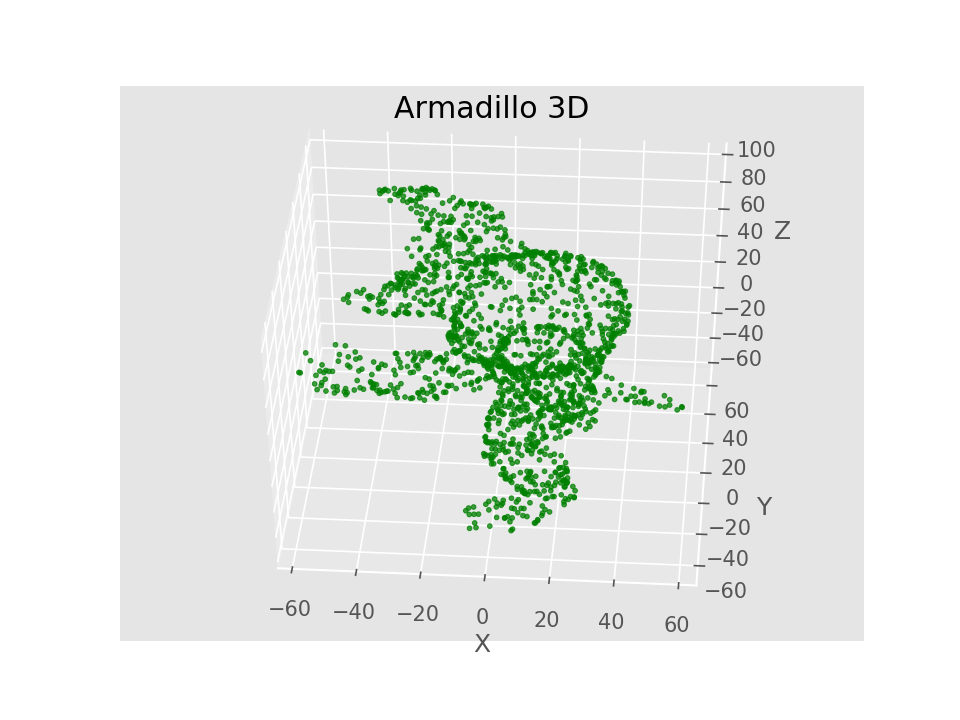

In [8]:
# Render the Original Armadillo
%matplotlib notebook

fig = plt.figure()
ax  = fig.add_subplot(111, projection='3d')

ax.set_title('Armadillo 3D')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.scatter(armadillo.x, armadillo.y, armadillo.z, c='green', marker='.', alpha=0.75)

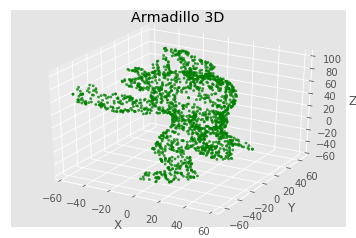

In [7]:
plt.show()

### Time Execution Speeds

Let's see how long it takes PCA to execute:

In [21]:
%timeit pca = do_PCA(armadillo, 'full')

The slowest run took 7.24 times longer than the fastest. This could mean that an intermediate result is being cached.
1000 loops, best of 3: 410 µs per loop


Render the newly transformed PCA armadillo!

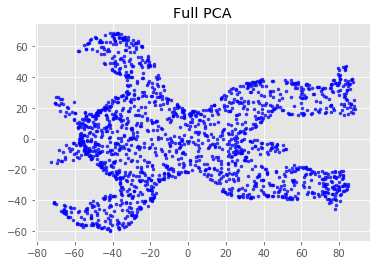

In [22]:
pca = do_PCA(armadillo, 'full')

fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_title('Full PCA')
ax.scatter(pca[:,0], pca[:,1], c='blue', marker='.', alpha=0.75)
plt.show()

Let's also take a look at the speed of the randomized solver on the same dataset. It might be faster, it might be slower, or it might take exactly the same amount of time to execute:

In [23]:
%timeit rpca = do_PCA(armadillo, 'randomized')

The slowest run took 15.22 times longer than the fastest. This could mean that an intermediate result is being cached.
100 loops, best of 3: 1.21 ms per loop


Let's see what the results look like:

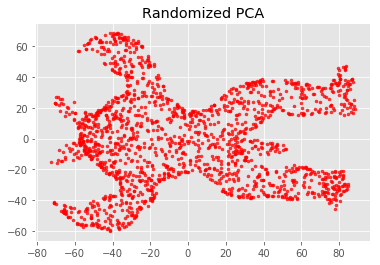

In [24]:
rpca = do_PCA(armadillo, 'randomized')

fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_title('Randomized PCA')
ax.scatter(rpca[:,0], rpca[:,1], c='red', marker='.', alpha=0.75)
plt.show()